# ex05-Histograms of DEM Values

A [histogram](https://en.wikipedia.org/wiki/Histogram) is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable and was first introduced by Karl Pearson (Pearson, 1895). Histograms give a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable. The total area of a histogram used for probability density is always normalized to 1

When plotting the histogram of DEM values, it could represent the distribution of pixel elevation values. This plot is useful to:

- Identify outlier data values
- Assess the min and max values in the data
- Explore the general distribution of elevation values in the data - i.e. is the area generally flat, hilly, is it high elevation or low elevation.

In this notebook, xarray + rasterio are still used to read data, and seaborn is used to plot histograms. [Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Read data

In [2]:
infile = "data/FloodFill/terrain.asc"

da_dem = xr.open_rasterio(infile).drop('band')[0].rename({'x':'longitude', 'y':'latitude'})
nodata = da_dem.nodatavals[0]
da_dem = da_dem.where(da_dem>nodata, np.nan)

## DEM Histogram

- Convert to 1D array so it can be coerced into a histogram using .ravel()
- remove nan values as sns.distplot does not support nans. 

In [3]:
arr_dem = da_dem.values.ravel()
arr_dem = arr_dem[~np.isnan(arr_dem)]
arr_dem.shape

(12966924,)

***Plotting***

A little bit slow as there are too many grids.

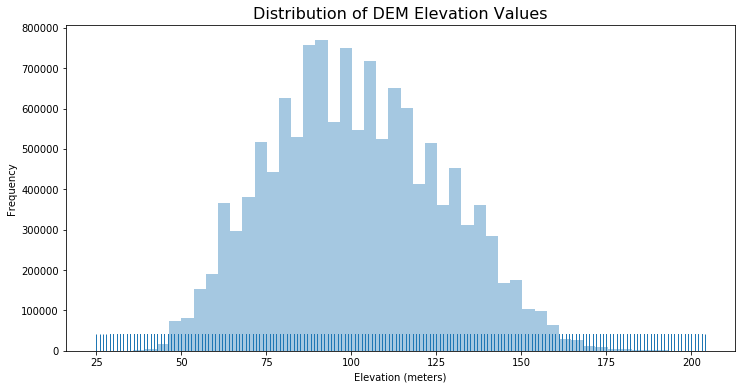

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(arr_dem, 
             kde=False, 
             rug=True,
             ax=ax
            )

_ = ax.set_title("Distribution of DEM Elevation Values", fontsize=16)
_ = ax.set_xlabel('Elevation (meters)')
_ = ax.set_ylabel('Frequency')

A histogram is a good way to show how the data are distributed. Each bin or bar in the plot represents the number or frequency of pixels that fall within the range specified by the bin.

In addition, there are quite a few options in seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None), where the ***bins= argument*** can be used to specify fewer or more breaks in a histogram. Note that this argument does not result in the exact number of breaks that you may want in your histogram. Different combination will present different visualization effects. Worth a try!

***Fitting a distribution***

From the above histogram, the DEM values seems to be able to fitted into a normal distribution. Let's have a look.

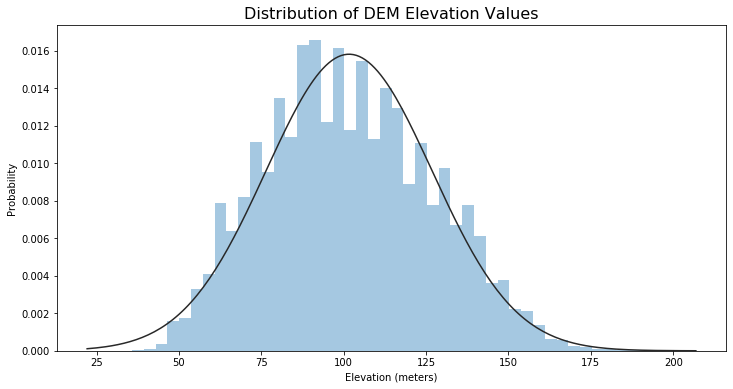

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(arr_dem, 
             fit=norm, 
             kde=False, 
             ax=ax)

_ = ax.set_title("Distribution of DEM Elevation Values", fontsize=16)
_ = ax.set_xlabel('Elevation (meters)')
_ = ax.set_ylabel('Probability')

## References

Pearson, K. (1895). Contributions to the Mathematical Theory of Evolution. II. Skew Variation in Homogeneous Material. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences. 186: 343–414. Bibcode:1895RSPTA.186..343P. doi:10.1098/rsta.1895.0010

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

https://rasterio.readthedocs.io/en/stable/

http://xarray.pydata.org/en/stable/

https://en.wikipedia.org/wiki/Histogram

https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot